In [103]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [104]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [105]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [106]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [107]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [108]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the scaled DataFrame
display(df_scaled.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [109]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [110]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

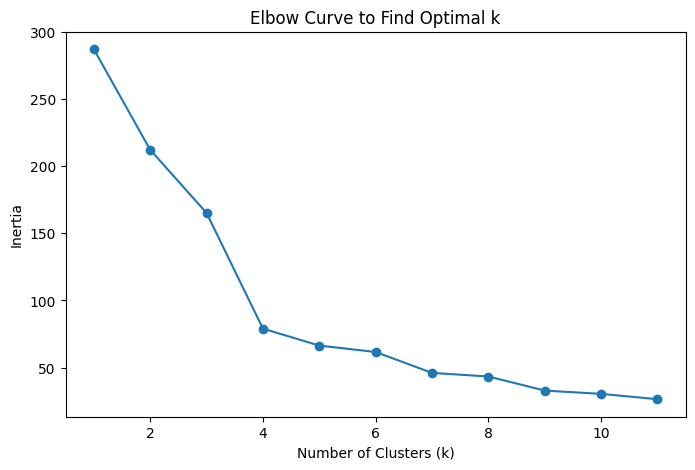

In [111]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Find Optimal k')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [112]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=1)

In [113]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_scaled)

KMeans(n_clusters=4, random_state=1)

In [114]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [115]:
# Create a copy of the scaled DataFrame
df_scaled_clustered = df_scaled.copy()

In [116]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_clustered['Cluster'] = clusters

# Display the copy of the scaled DataFrame
df_scaled_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [117]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_scaled_clustered.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    by="Cluster",
    hover_cols=["coin_id"]
)

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [118]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [119]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_scaled)

# View the scaled PCA data
print(pca_data)

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]
 [-0.51653377  1.38837748  0.80407131]
 [-0.45071134  0.51769912  2.84614316]
 [-0.34559977  0.72943939  1.47801284]
 [-0.64946792  0.43216514  0.60030286]
 [-0.75901394 -0.20119979 -0.21765292]
 [-0.24819846 -1.37625159 -1.46202571]
 [-0.43840762 -0.17533654 -0.6633884 ]
 [-0.69342533 -0.47381462 -0.52759693]
 [ 0.06049915  2.90940385  1.49857131]
 [-0.39335243 -0.10819197 -0.01275608]
 [-0.79617564 -0.49440875  1.08281169]
 [ 0.06407452 -1.26982514 -1.09882928]
 [-0.48901506 -0.73271912 -0.06254323]
 [-0.3062723   0.70341515  1.71422359]
 [-0.51352775 -0.14280239 -0.65656583]
 [-0.36212044 -0.98691441 -0.72875232]
 [-0.60426463  0.82739764  0.43931594]
 [-0.4132956  -0.67411527 -1.07662834]
 [-0.40748304 -0.21250655 -0.35142563]
 [ 0.60897382  0.56353212 -1.14874159]
 [-0.45021114 -0.15101945

In [120]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_.sum()
print(f'Total explained variance: {explained_variance:.2f}')

Total explained variance: 0.90


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.90

In [121]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=df_scaled.index)

# Display the scaled PCA DataFrame
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [122]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=1)
    kmeans_pca.fit(df_pca)
    inertia_pca.append(kmeans_pca.inertia_)

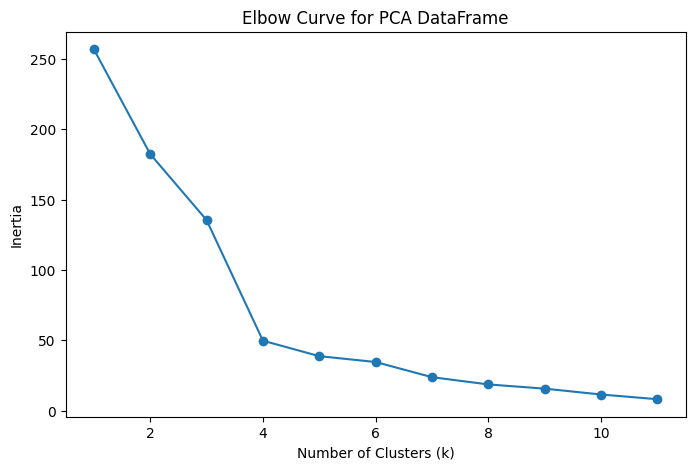

In [123]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_pca, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for PCA DataFrame')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [124]:
# Initialize the K-Means model using the best value for k
kmeans_pca_model = KMeans(n_clusters=best_k, random_state=1)

In [125]:
# Fit the K-Means model using the PCA data
kmeans_pca_model.fit(df_pca)

KMeans(n_clusters=4, random_state=1)

In [126]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_clusters = kmeans_pca_model.predict(df_pca)

# Print the resulting array of cluster values.
print(pca_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [127]:
# Create a copy of the scaled PCA DataFrame
df_pca_clustered = df_pca.copy()
df_pca_clustered['Cluster'] = pca_clusters

# Display the copy of the scaled PCA DataFrame
df_pca_clustered.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [128]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_pca_clustered.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    by="Cluster",
    hover_cols=["coin_id"]
)

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [129]:
# Composite plot to contrast the Elbow curves
elbow_curve = pd.DataFrame(elbow_data).hvplot.line(x='k', y='inertia', title='Elbow Curve (Original)')
elbow_curve_pca = pd.DataFrame({"k": k_values, "inertia": inertia_pca}).hvplot.line(x='k', y='inertia', title='Elbow Curve (PCA)')
scatter_original = df_scaled_clustered.hvplot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", by="Cluster")
scatter_pca = df_pca_clustered.hvplot.scatter(x="PC1", y="PC2", by="Cluster")

In [130]:
# Composite plot to contrast the clusters
(elbow_curve + elbow_curve_pca) + (scatter_original + scatter_pca)

:Layout
   .Curve.I      :Curve   [k]   (inertia)
   .Curve.II     :Curve   [k]   (inertia)
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** They are very similar, PCA may remove noise but can also remove some details.